# 적분

## trapezoidal rule

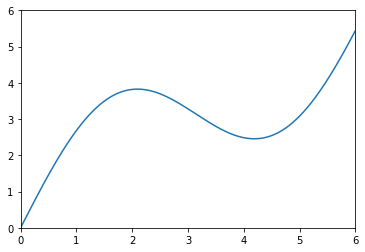

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

xdata = np.arange(0,8,0.01)
def yfunc(x):
    return 2*np.sin(x)+x

plt.xlim(0,6);plt.ylim(0,6)
plt.plot(xdata,yfunc(xdata));

$\begin{align} \int_0^6 x+2 \sin(x) dx &= \frac{1}{2}x^2 |^6_0 - 2 \cos(x) |^6_0 =20-2 \cos[6] \approx 18.08 \end{align}$

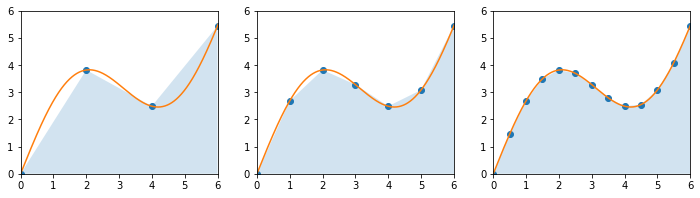

In [4]:
x1 = np.arange(0,8,2)
x2 = np.arange(0,8,1)
x3 = np.arange(0,8,0.5)

plt.figure(figsize=(12,3));
plt.subplot(1,3,1)
plt.xlim(0,6);plt.ylim(0,6)
plt.plot(x1,yfunc(x1),'o');
plt.plot(xdata,yfunc(xdata));
plt.fill_between(x1,yfunc(x1),alpha=0.2)

plt.subplot(1,3,2)
plt.xlim(0,6);plt.ylim(0,6)
plt.plot(x2,yfunc(x2),'o');
plt.plot(xdata,yfunc(xdata));
plt.fill_between(x2,yfunc(x2),alpha=0.2)

plt.subplot(1,3,3)
plt.xlim(0,6);plt.ylim(0,6)
plt.plot(x3,yfunc(x3),'o');
plt.plot(xdata,yfunc(xdata));
plt.fill_between(x3,yfunc(x3),alpha=0.2)

In [5]:
def yfunc(x):
    return 2*np.sin(x)+x

def trapez(f,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

trapez(yfunc,0,6,100)

18.41139037491261

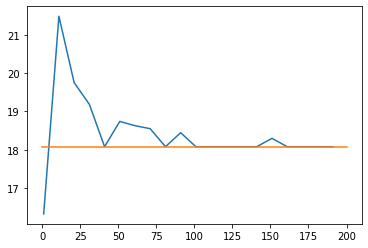

In [149]:
xdata=np.arange(1,200,10)
ydata=np.array([trapez(yfunc,0,6,i) for i in xdata])
plt.plot(xdata,ydata)
plt.plot([0,200],[20-2*np.cos(6),20-2*np.cos(6)]);

# scipy.integrate
* Trapezoidal 
* Simplson's
* Romberg
* Gaussian quadrature
* What is the best? It depends very much on your problem. 

### integrating functions, given fixed samples

In [150]:
import scipy 
# y = 2*sin(x) + x
def yfunc(x):
    return 2*np.sin(x)+x
scipy.integrate.quad(yfunc,0,6) # gaussian quadrature

(18.079659426699266, 2.0072454172902782e-13)

### integrating functions, given fixed samples

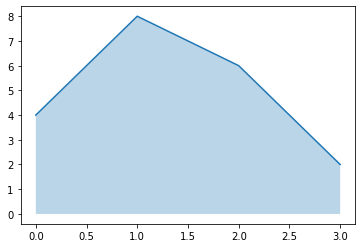

In [9]:
xsamples = [0,1,2,3]
ysamples = [4,8,6,2]
plt.plot(xsamples,ysamples,'-')
plt.fill_between(xsamples,ysamples,alpha=0.3);

In [159]:
scipy.integrate.trapz(ysamples) # trapezoidal

17.0

In [153]:
scipy.integrate.simps(ysamples) # simpson's 

17.666666666666664

## indefinite integrating
* For an integral over the range $(0, \infty)$:  
$x=\frac{z}{1-z}, \quad dx = \frac{dz}{(1-z)^2}$.
* For an integral over the range $(-\infty, \infty)$:  
$x=\tan z, \quad dx= \frac{dz}{\cos^2 z}$. 

$I = \int_0^\infty e^{-x^2} dx = \int_0^1 e^{-z^2/(1-z)^2}\frac{dz}{(1-z)^2} $

In [157]:
def funcI(x):
    return np.exp(-x**2/(1-x)**2)/(1-x)**2
scipy.integrate.quad(funcI,0,1), np.sqrt(np.pi)/2

((0.886226925452758, 5.35508277725214e-09), 0.8862269254527579)

$I_2 = \int_{-\infty}^{\infty} e^{-x^2} dx = \int_{-\pi/2}^{\pi/2} e^{-\tan^2 z} \frac{dz}{\cos^2 z} $

In [158]:
def funcI2(x):
    return np.exp(-np.tan(x)**2)/np.cos(x)**2
scipy.integrate.quad(funcI2,-np.pi/2,np.pi/2), np.sqrt(np.pi)

((1.772453850905499, 2.0044703016899445e-08), 1.7724538509055159)